<div style='float: right'><img src='pic/tile.png'/></div>

## <div id='tile' />タイルペイント

In [1]:
#!pip3 install pulp ortoolpy
%matplotlib inline
import pandas as pd, matplotlib.pyplot as plt
from pulp import LpProblem, lpSum, value
from ortoolpy import addbinvars
data = """\
ABCD
EBFF
GHHI
JKLI
""".splitlines()
hint_v,hint_h = [1,2,3,2],[1,4,1,2]

### 問題
* 盤面上にある、太線で区切られた部分（タイルと呼ぶ）のいくつかを黒くぬります
* 盤面の数字は、その右あるいは下の、外周か次の斜線のマスまでの区切られた一列のうちで、黒くぬられるマスの数を表します
* どのタイルも、すべてのマスをぬるかすべてのマスをぬらずにおくかのどちらかとし、タイルの一部のマスだけをぬってはいけません

### 変数
* v：黒かどうか (1)

### 制約
* 縦及び横のヒントの数に等しい (2)
* タイルは全部塗るか塗らないか（バイナリ変数不要）(3)

In [2]:
ni, nj = len(data), len(data[0])
a = pd.DataFrame([(i,j,data[i][j]) for i in range(ni)
    for j in range(ni)], columns=list('行列字'))
a['Var'] = addbinvars(len(a))
a[:2]

,行,列,字,Var
0,0,0,A,v000001
1,0,1,B,v000002


In [3]:
m = LpProblem()
for i in range(ni):
    m += lpSum(a[a.行==i].Var) == hint_v[i]
for j in range(nj):
    m += lpSum(a[a.列==j].Var) == hint_h[j]
for _,v in a.groupby('字'):
    for vi, vj in zip(v.Var, v.Var[1:]):
        m += vi == vj
m.solve()

1

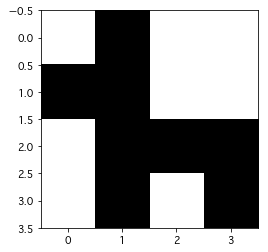

In [4]:
a['Val'] = a.Var.apply(value)
plt.imshow((a.Val<0.5).values.reshape(ni,nj), cmap='gray', interpolation='none');